<a href="https://colab.research.google.com/github/RABHIARWA/Loans_Eligibility_Prediction/blob/main/ProtLoans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import the required libraries**


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

## **1- DATA PREPARATION**

1.   [Élément de liste](https://)
2.   Élément de liste




For this lab, we will be using the cs-training.csv file. The data contains credit details of credit borrowers


We will read and understand our data and apply some cleaning function when it is needed .

Data Description:

-Unammed: 0 : we will keep it is the ID column which starts with 1

-SeriousDlqin2yrs

-RevolvingUtilizationOfUnsecuredLines

-age

-NumberOfTime30-59DaysPastDueNotWorse


-DebtRatio

-MonthlyIncome

-NumberOfOpenCreditLinesAndLoans

-NumberOfTimes90DaysLate

-NumberRealEstateLoansOrLines

-NumberOfTime60-89DaysPastDueNotWorse

-NumberOfDependents

Let's read the data into *pandas* data frame and look our data.


In [ ]:
cell_df = pd.read_csv("cs-training.csv")

cell_df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


Droping Unnamed column because it doesn t represent any data just a replica of ID column

In [ ]:
cell_df.drop("Unnamed: 0", axis=1,inplace=True)


our data INFO :

In [ ]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

According to the output above, we have 62948 entries, 0 to 62947.
We also have a mix of numerical (1 int64 for column id)and (and 11 float64 for other columns ) and (no object data types)


Next, let's use the `describe()` function to show the count, mean, min, max of our attributes.


In [ ]:
cell_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


 - *Looking for NaN*

In [ ]:
cell_df.isnull().values.any()


True

there NaN values existing in our data set

Text(0.5, 1.0, 'Total Missing Values')

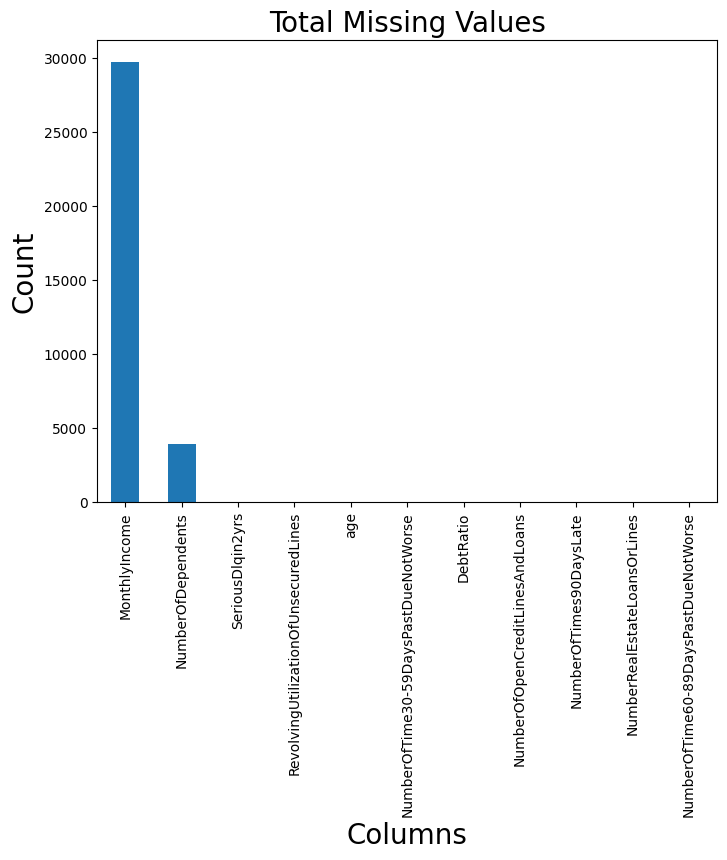

In [ ]:
total = cell_df.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [ ]:
cell_df.isnull().sum().sum()

33655

We have 14176 undefined values



In [ ]:
cell_df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


29731 undefined values in feature 'MonthlyIncome'

3924 undefined value  in feature 'NumberOfDependents'

---> We will take care of NaN values and replace them with MEAN of their feature .
The "MEAN" is a statistical measure that represents the average value of a set of numbers. we don t want to drop rows because the number is high and it is important to us to keep other features data .

In [ ]:

cell_df.fillna(cell_df.mean(),inplace=True)



test


In [ ]:
cell_df.isnull().values.any()


False

False return : our data set is NaN free




- *check for duplicated rows*


In [ ]:
duplicates = cell_df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

# Display the duplicated rows (if any)
if duplicates.any():
    duplicated_rows = cell_df[duplicates]
    print("\nDuplicated Rows:")
    print(duplicated_rows)


Number of duplicate rows: 609

Duplicated Rows:
        SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1669                   0                                   1.0   29   
7823                   0                                   1.0   29   
7920                   0                                   1.0   22   
8840                   0                                   1.0   23   
10869                  0                                   1.0   73   
...                  ...                                   ...  ...   
149139                 0                                   0.0   77   
149431                 0                                   1.0   25   
149472                 0                                   1.0   84   
149769                 0                                   1.0   23   
149993                 0                                   1.0   22   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1669                     

No duplicated rows were found in our data set

-  LOOKING FOR CORREALATION

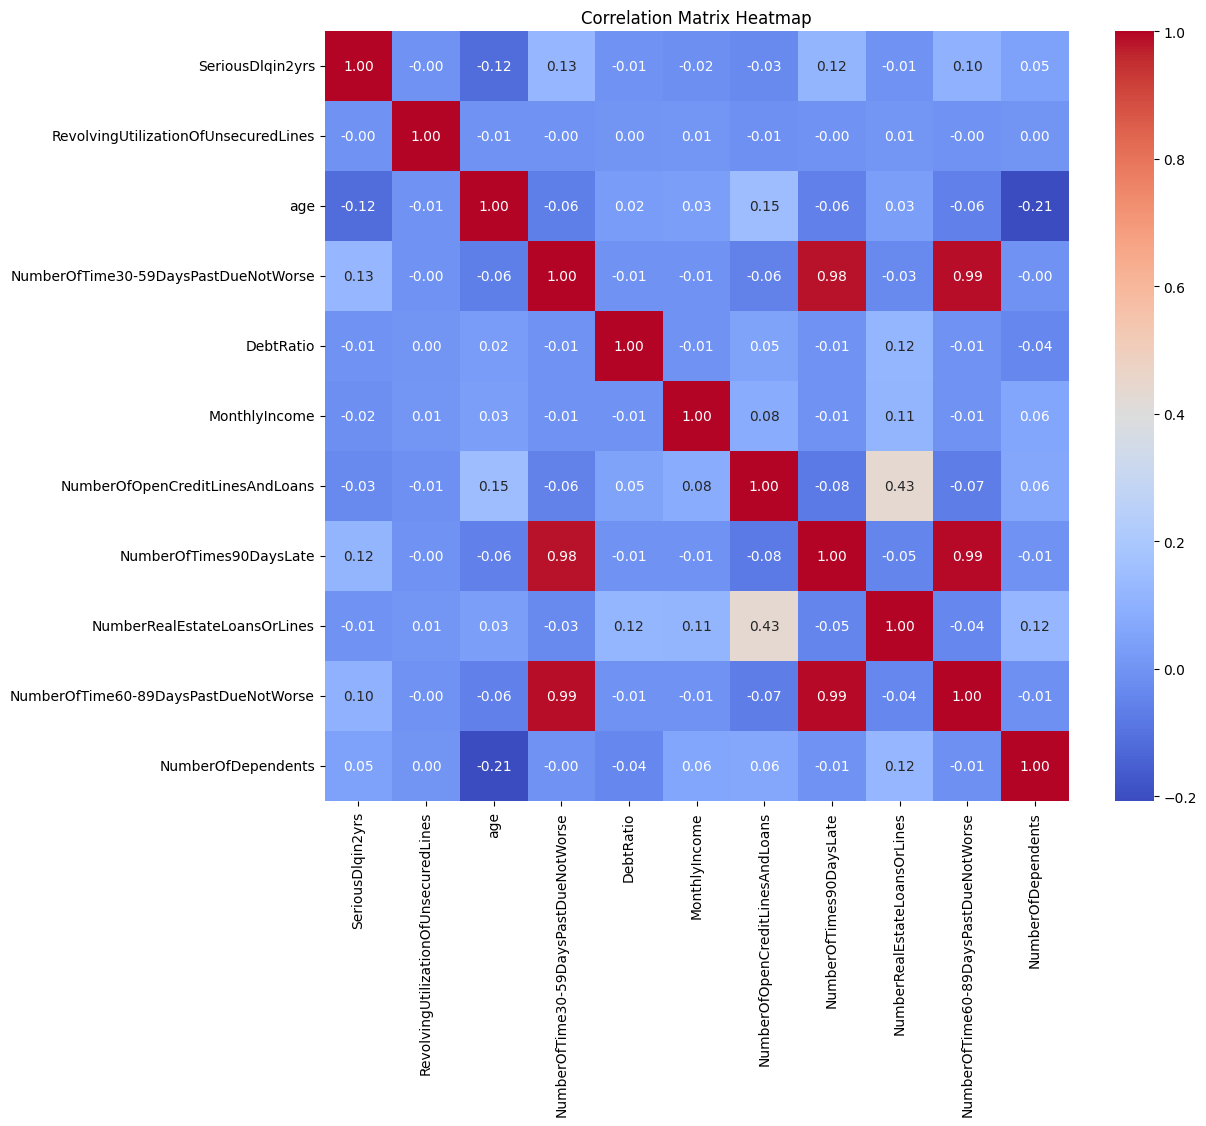

In [ ]:
# Compute the correlation matrix
correlation_matrix = cell_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

This is heat map for correlated values we are goona look now for values which are greater than 0.5

In [ ]:
# Compute the correlation matrix
correlation_matrix = cell_df.corr()

# Set the threshold for correlation
correlation_threshold = 0.5

# Find pairs of variables with correlation greater than the threshold
correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Print the correlated pairs and their correlation coefficients
print(f"Correlated values with correlation coefficient > {correlation_threshold}:\n")
for pair in correlated_pairs:
    print(f"{pair[0]} and {pair[1]}: {correlation_matrix.loc[pair[0], pair[1]]:.2f}")

Correlated values with correlation coefficient > 0.5:

NumberOfTime30-59DaysPastDueNotWorse and NumberOfTimes90DaysLate: 0.98
NumberOfTime30-59DaysPastDueNotWorse and NumberOfTime60-89DaysPastDueNotWorse: 0.99
NumberOfTimes90DaysLate and NumberOfTime60-89DaysPastDueNotWorse: 0.99


---> we have got three features with a correalation value higher than 0.98 . this can cause redundancy, affecting model interpretability and potentially performance.
we are going to keep 'NumberOfTimes90DaysLate' because it has a longer period in term of days and we will drop the other two.




In [ ]:
cell_df.drop("NumberOfTime30-59DaysPastDueNotWorse", axis=1,inplace=True)
cell_df.drop("NumberOfTime60-89DaysPastDueNotWorse", axis=1,inplace=True)

the two features : "NumberOfTime30-59DaysPastDueNotWorse" and"NumberOfTime60-89DaysPastDueNotWorse"
 are dropped

- Finding outliers using BOXPLOT

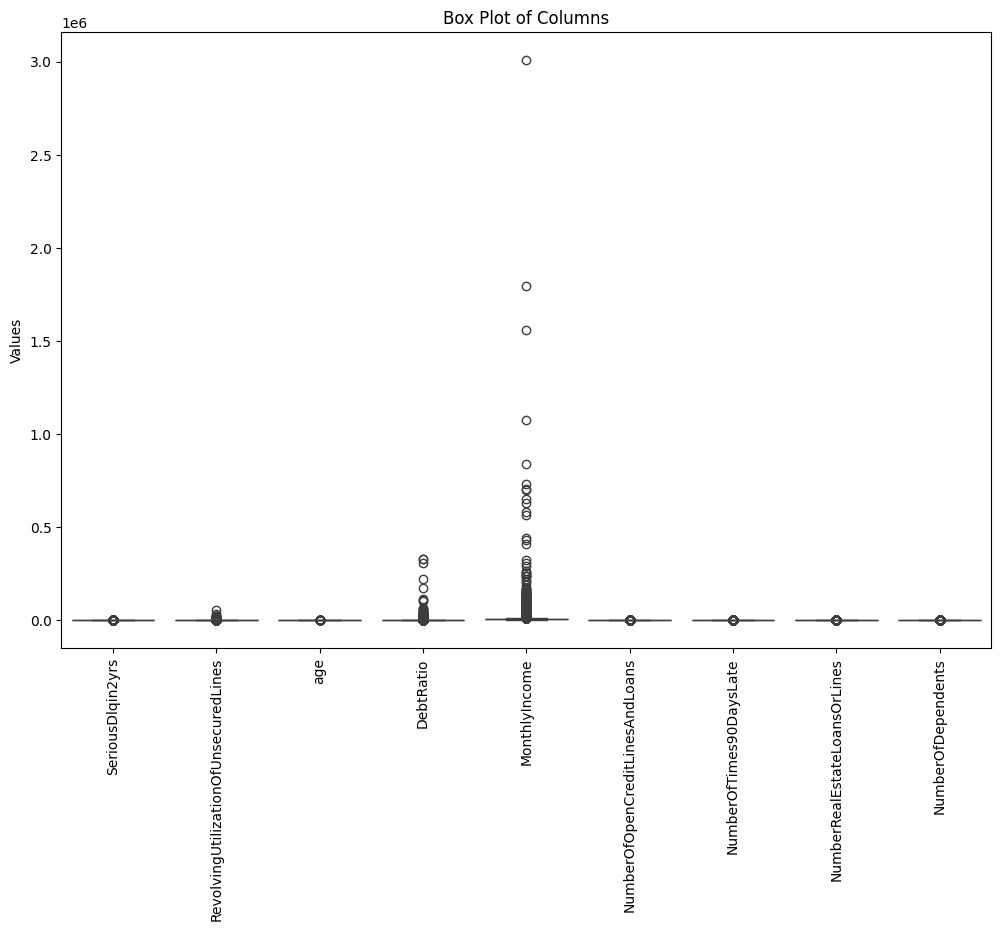

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=cell_df, orient='v')
plt.title('Box Plot of Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

---> Obviously , we have some outliers in 'MonthlyIncome' , it can negatively impact our model . First, we will sort all of our 'MonthlyIncome' values and select only the last four.


In [ ]:
cell_df.sort_values(by = 'MonthlyIncome', ascending = False)[:4]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents
73763,0,0.007328,52,0.001470,3008750.0,10,0,1,3.0
137140,0,0.000000,68,0.002776,1794060.0,15,0,1,0.0
111365,0,0.163856,44,0.004013,1560100.0,12,0,4,2.0
50640,0,0.469025,44,0.004537,1072500.0,9,0,2,1.0


Now we will dop these four rows.


In [ ]:
cell_df.drop(cell_df.index[[73764,137141,111366,50641]],inplace=True)




- **Normalization**


It is a crucial step in many machine learning algorithms

Now we can normalize the data set. it transforms features by scaling each feature to a given range. It is by default (0, 1).

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Make a copy of the DataFrame without the chosen column
columns_to_scale = cell_df.columns

data_to_scale = cell_df[columns_to_scale].copy()

z = data_to_scale .values #returns a numpy array
min_max_scaler = MinMaxScaler()
scaled_df = min_max_scaler.fit_transform(z)
scaled_df [0:5]

array([[1.00000000e+00, 1.51085945e-05, 4.12844037e-01, 2.43575922e-06,
        3.03115912e-03, 2.24137931e-01, 0.00000000e+00, 1.11111111e-01,
        1.00000000e-01],
       [0.00000000e+00, 1.88757399e-05, 3.66972477e-01, 3.69698241e-07,
        8.64146240e-04, 6.89655172e-02, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-02],
       [0.00000000e+00, 1.29798087e-05, 3.48623853e-01, 2.58182195e-07,
        1.01105110e-03, 3.44827586e-02, 1.02040816e-02, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 4.61090510e-06, 2.75229358e-01, 1.09352802e-07,
        1.09680100e-03, 8.62068966e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 1.78914451e-05, 4.49541284e-01, 7.56093932e-08,
        2.11343581e-02, 1.20689655e-01, 0.00000000e+00, 1.85185185e-02,
        0.00000000e+00]])

Note the data is now a `ndarray`


we used MinMaxScaler because it is more suitable for our model ( segmentation )

## **2- MODEL**


After preparing and cleaning our data,it is time now to implement our MODEL .
We will apply two models :

   1- K-Means Clustering

   2- Agglomerative Hierarchical Clustering

- **K-Means Clustering**


K-means is a clustering algorithm that partitions data into K clusters by iteratively assigning points to the nearest cluster centroid and updating centroids based on the mean of the assigned points

To know  the optimal number of clusters we will use the elbow method :

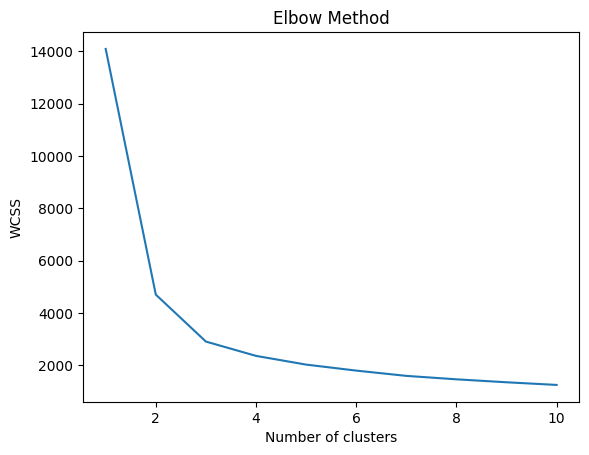

In [ ]:
# Import necessary libraries


from sklearn.cluster import KMeans

wcss=[]    # Within Cluster Sum of Squares


for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


--> The elbow method is effective and it shows us that we need 3 clusters

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(scaled_df)
labels = kmeans.labels_

# Get cluster labels for each data point
cell_df['Cluster'] = kmeans.labels_
cell_df



,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents,Cluster
0,1,0.766127,45,0.802982,9120.000000,13,0,6,2.0,1
1,0,0.957151,40,0.121876,2600.000000,4,0,0,1.0,2
2,0,0.658180,38,0.085113,3042.000000,2,1,0,0.0,2
3,0,0.233810,30,0.036050,3300.000000,5,0,0,0.0,2
4,0,0.907239,49,0.024926,63588.000000,7,0,1,0.0,2
...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0.225131,2100.000000,4,0,1,0.0,0
149996,0,0.299745,44,0.716562,5584.000000,4,0,1,2.0,2
149997,0,0.246044,58,3870.000000,6670.221237,18,0,1,0.0,0
149998,0,0.000000,30,0.000000,5716.000000,4,0,0,0.0,2


--> We applied KMEANS model to our scaled data .

 We segmented our data to 3 clusters and we added a column named 'Cluster' .

 Cluster column will take 0 or 1 or 2

Mean of the column cluster

In [ ]:
cell_df.groupby('Cluster').mean()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents
Cluster,,,,,,,,,
0,0.0,4.748628,65.190274,421.743421,7000.557923,9.472864,0.036161,1.057834,0.394441
1,1.0,4.367702,45.927880,295.150390,5803.999625,7.882294,2.091571,0.988429,0.944892
2,0.0,7.507818,41.025828,296.280610,6479.481412,7.570663,0.228609,0.985053,1.073115


-->there is some patterns in our cluster according to some features :

- old adults have high monthly income and high debt ratio

- young adults lower monthly income and lower debt ratio

scatter plot with age and monthly income

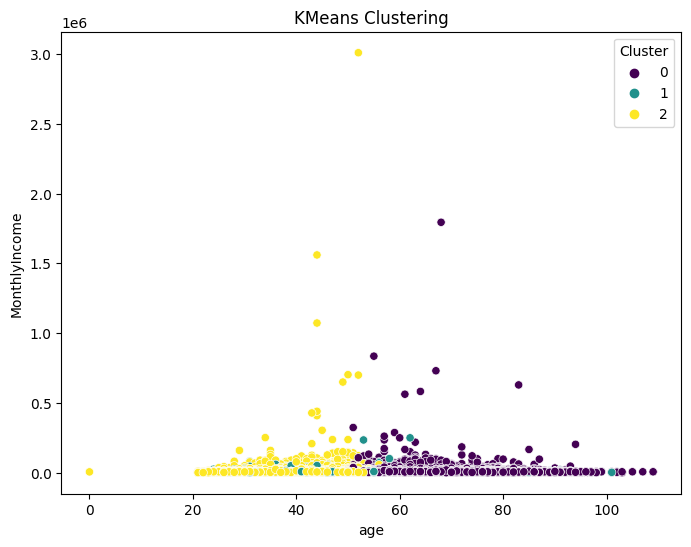

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='MonthlyIncome', hue='Cluster', data=cell_df, palette='viridis')
plt.title('KMeans Clustering')
plt.xlabel('age')
plt.ylabel('MonthlyIncome')
plt.show()



--> There is two clear clusters in the plot depends highly of age and monthly income

Now passing to the second model

- **Agglomerative Hierarchical Clustering**


Agglomerative Hierarchical Clustering merges similar data points or clusters step-by-step, forming a hierarchy of clusters, and doesn't require a predefined number of clusters, iterating until a stopping criterion is met, like a set number of clusters or a distance threshold.

We will work on variables :  cell instead of cell_df and scaled_cell instead of scaled_df to compare the two methods

Dendogram :   

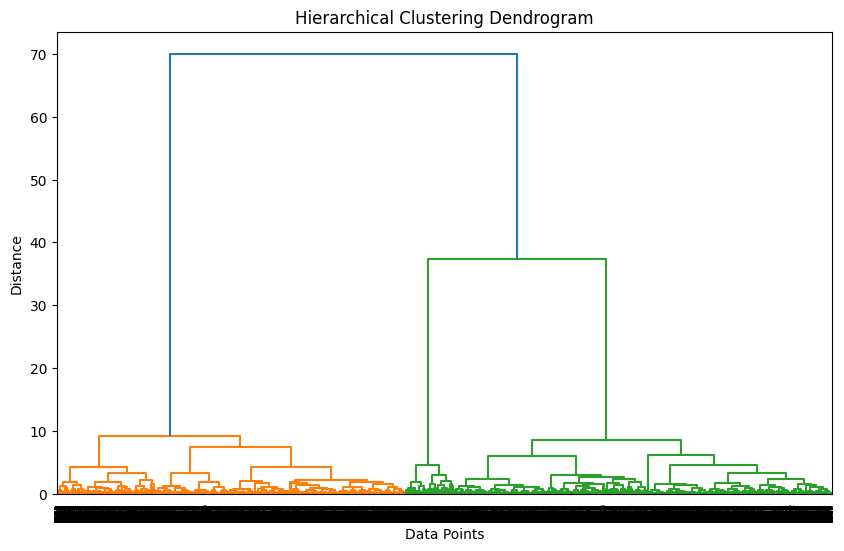

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Define the range of indices to drop
start_index = 10000
end_index = 150000

cell=cell_df

# Dropping rows within the specified index range
cell = cell.drop(cell.index[start_index:end_index + 1])

#renormalize
columns_to_scale = cell.columns
data_to_scale = cell[columns_to_scale].copy()
z = data_to_scale .values #returns a numpy array
min_max_scaler = MinMaxScaler()
scaled_cell = min_max_scaler.fit_transform(z)

# Perform hierarchical clustering
# You may need to choose a distance metric and linkage method based on your data
# Here, 'ward' linkage is used as an example
hc = linkage(scaled_cell, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(hc)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


--> Based on the dendogram we will cut at theshold=10 .>clearly it will give us also 3 clusters

In [ ]:
cell.groupby('Cluster').mean()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents
Cluster,,,,,,,,,
1,0.000000,3.705891,65.168075,435.086366,7005.348085,9.369053,0.034904,1.053802,0.408309
2,1.000000,13.601046,45.979463,327.151735,5850.351927,7.661927,0.644550,1.004739,0.845364
3,0.001438,4.936023,40.955227,275.306421,6361.981365,7.487780,0.359417,0.966112,1.051420


Cluster column is added and wil take : 1,2,3

--> like kmeans there is pattern in feature age and monthly income


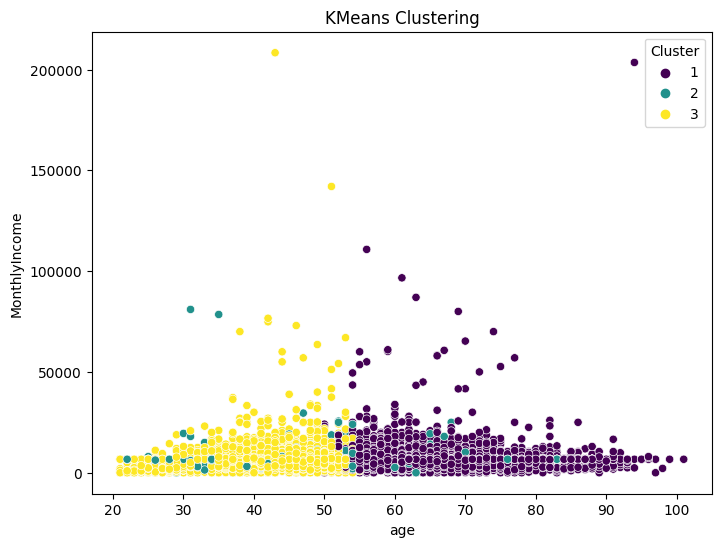

In [ ]:
from scipy.cluster.hierarchy import fcluster



# Cut the dendrogram to get clusters
# 't' is the threshold height or distance to cut the dendrogram
threshold = 10 # Change this value based on your dendrogram
clusters = fcluster(hc, threshold, criterion='distance')

# Add the cluster labels to your original dataframe
cell['Cluster'] = clusters

# Visualizing the clusters (assuming 2D data for simplicity)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='MonthlyIncome', hue='Cluster', data=cell, palette='viridis')
plt.title('KMeans Clustering')
plt.xlabel('age')
plt.ylabel('MonthlyIncome')
plt.show()

the plot is he same us kmeans when we put age and monthly income :     

- old adults have high monthly income and high debt ratio

- young adults lower monthly income and lower debt ratio

## **1- EVALUATION**


The silhouette score in unsupervised learning assesses cluster quality by measuring how similar data points are to their own cluster compared to others .

- SI for kmeans model :

In [ ]:
from sklearn.metrics import silhouette_score

# Assuming 'data' is your dataset and 'labels' are the cluster labels assigned by the clustering algorithm

silhouette_avg = silhouette_score(scaled_df,cell_df['Cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.39817425205159207


- SI for CAH model

In [ ]:
silhouette_avg = silhouette_score(scaled_cell,cell['Cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.7871846030206465


---> obviously the CAH model has a better score  . it means that the rows belongs to their cluster better than kmeans .

kmeans scored very low, we will make sure now of the accuracy of its cluster , will Kmeans cluster the data the same every time is used ?  

we will split our data to train and test set . ( accordingly 80% and 20% )

In [ ]:


from sklearn.model_selection import train_test_split


#feature_df = cell_df.drop('Cluster', axis=1)
celldf_without_cluster = cell_df.drop(columns=['Cluster'])


z = celldf_without_cluster.values #returns a numpy array
min_max_scaler = MinMaxScaler()
scaled_df2 = min_max_scaler.fit_transform(z)
X = scaled_df2

y = cell_df['Cluster']





X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
#shape of our data
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_train,y_train)
yhat = kmeans.predict(X_test)
yhat.shape

Train set: (119996, 9) (119996,)
Test set: (30000, 9) (30000,)


(30000,)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13608
           1       1.00      1.00      1.00      1973
           2       1.00      1.00      1.00     14419

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

Confusion matrix, without normalization
[[13591     0    17]
 [    0  1973     0]
 [    0     0 14419]]


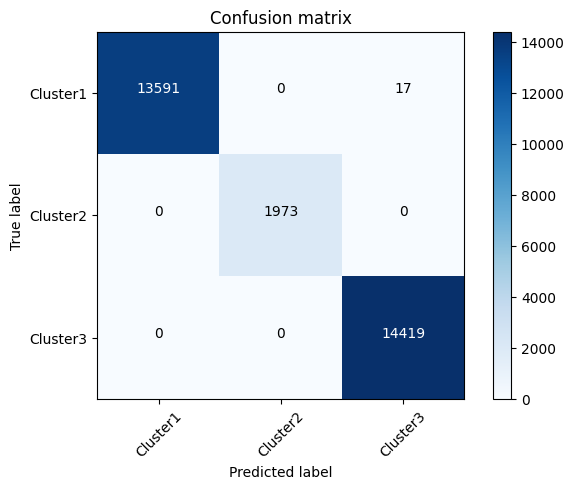

In [ ]:
# Plot confusion matrix and compute F1-Score
from sklearn.metrics import classification_report, confusion_matrix
import itertools

cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Cluster1','Cluster2', 'Cluster3'],normalize= False,  title='Confusion matrix')



--> the Confusion matrix shows very good results

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, kmeans.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
# to find out if there is an overfitting

Train set Accuracy:  0.9995083169438981
Test set Accuracy:  0.9994333333333333


--> the accuracy is very high ,it means that KMEANS model uses the same centroids again and again giving us the same cluster every time

conclusion :

- the two models divided our data into 3 cluster but CAH model is more effective in terms of how near is the distance between each data and their cluster